In [16]:
import numpy as np
from features_to_hdf5 import features_to_hdf5

In [2]:
def label(f):
    if f.find('cat') == -1:
        return np.asarray([0])
    else:
        return np.asarray([1])

In [3]:
features_to_hdf5('./train/*.jpg', 'train.hdf5', label_callback=label)

Reading a total of 25000 files...
25000/25000 [==============================] - 1020s  
Successfully transformed 25000 files
Clearning up...
25000/25000 [==============================] - 14s    


In [4]:
features_to_hdf5('./test1/*.jpg', 'test.hdf5')

Reading a total of 12500 files...
12500/12500 [==============================] - 511s   
Successfully transformed 12500 files
Clearning up...
12500/12500 [==============================] - 7s     


In [40]:
!ls

best_method.hdf5    test1      test.hdf5.txt  train.hdf5
cats_vs_dogs.ipynb  test.hdf5  train	      train.hdf5.txt


# Classifying features with Keras

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

import h5py

from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.callbacks import ModelCheckpoint
from keras.utils.io_utils import HDF5Matrix

from scipy.misc import imread

In [47]:
X = HDF5Matrix('train.hdf5', 'features', start=0, end=20000)
y = HDF5Matrix('train.hdf5', 'labels', start=0, end=20000)
Xv = HDF5Matrix('train.hdf5', 'features', start=20000, end=25000)
yv = HDF5Matrix('train.hdf5', 'labels', start=20000, end=25000)

In [6]:
model = Sequential()
model.add(Dense(100, input_dim=3072, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1, input_dim=100, activation='sigmoid'))
model.compile('adam', 'binary_crossentropy', class_mode='binary')

In [48]:
batch_size = 100
nb_epoch = 10

checkpoint = ModelCheckpoint('best_method.hdf5', monitor='val_acc', save_best_only=True, verbose=1)

In [50]:
model.fit(X, y, batch_size=batch_size, nb_epoch=nb_epoch, show_accuracy=True, verbose=2,
          validation_data=[Xv, yv], callbacks=[checkpoint], shuffle='batch')

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
1s - loss: 0.1105 - acc: 0.9592 - val_loss: 0.0912 - val_acc: 0.9660
Epoch 00000: val_acc improved from -inf to 0.96600, saving model to best_method.hdf5
Epoch 2/10
1s - loss: 0.0584 - acc: 0.9797 - val_loss: 0.0880 - val_acc: 0.9664
Epoch 00001: val_acc improved from 0.96600 to 0.96640, saving model to best_method.hdf5
Epoch 3/10
1s - loss: 0.0364 - acc: 0.9878 - val_loss: 0.0994 - val_acc: 0.9644
Epoch 00002: val_acc did not improve
Epoch 4/10
1s - loss: 0.0247 - acc: 0.9929 - val_loss: 0.1144 - val_acc: 0.9646
Epoch 00003: val_acc did not improve
Epoch 5/10
1s - loss: 0.0176 - acc: 0.9946 - val_loss: 0.1272 - val_acc: 0.9642
Epoch 00004: val_acc did not improve
Epoch 6/10
1s - loss: 0.0135 - acc: 0.9960 - val_loss: 0.1352 - val_acc: 0.9628
Epoch 00005: val_acc did not improve
Epoch 7/10
1s - loss: 0.0113 - acc: 0.9969 - val_loss: 0.1311 - val_acc: 0.9646
Epoch 00006: val_acc did not improve
Epoch 8/10
1s - loss: 0.0091 - ac

In [9]:
model.load_weights('best_method.hdf5')

In [21]:
Xt = h5py.File('test.hdf5', 'r')[]

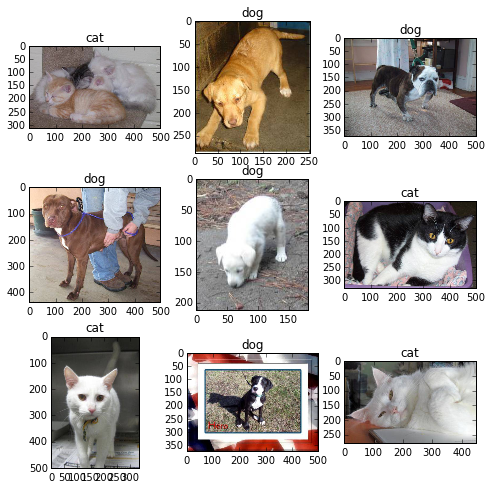

In [39]:
label = ['dog', 'cat']

plt.figure(figsize=[8,8])
with h5py.File('test.hdf5', 'r') as h5:
    Xt = h5['features']
    with open('test.hdf5.txt') as files:
        for i, f in enumerate(files):
            img = imread(f[:-1])
            predicted = model.predict_classes(Xt[i:i+1], verbose=0)[0]
            pet = label[predicted]

            plt.subplot(3,3,i)
            plt.imshow(img)
            plt.title(pet)
            if i == 9: break